In [1]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.cluster import KMeans

In [2]:
image_path = "../output_video/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

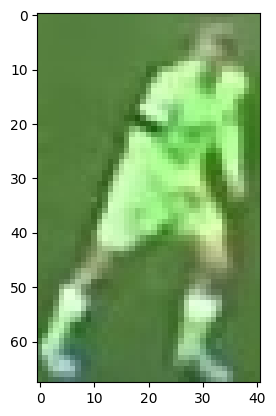

In [3]:
plt.imshow(image)
plt.show()

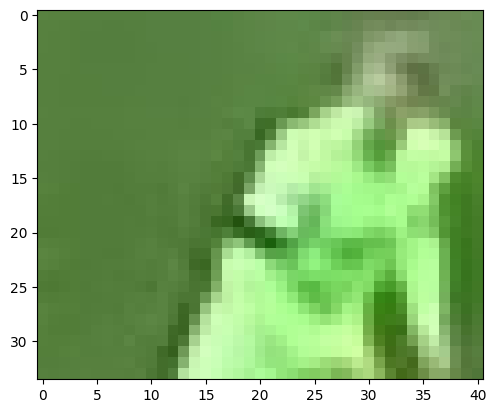

In [4]:
# take top half the image 

top_half_image = image[0: int(image.shape[0]//2), ]
plt.imshow(top_half_image)

In [5]:
# Cluster the image into two clusters 
cropped_image = top_half_image.reshape(-1, 3)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(cropped_image)


KMeans(n_clusters=2, random_state=42)

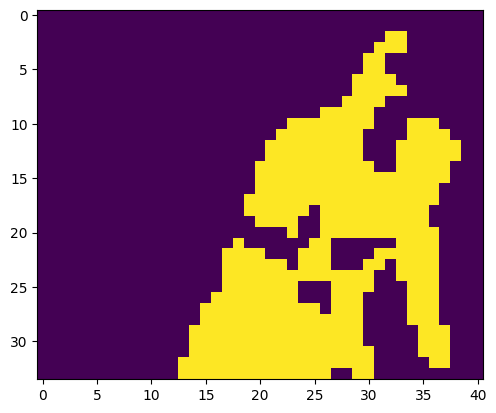

In [6]:
labels = kmeans.labels_
image_cluster = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])
plt.imshow(image_cluster)
plt.show()


In [7]:
corner_image = [image_cluster[0, 0], image_cluster[0, -1], image_cluster[-1, 0], image_cluster[-1, -1]]
non_player_image = max(set(corner_image), key=corner_image.count)
print(non_player_image)

0


In [8]:
player_cluster = 1 - non_player_image
print(player_cluster)

1


In [9]:
kmeans.cluster_centers_[player_cluster]

array([169.92269327, 233.92518703, 144.25187032])

In [10]:
kmeans.cluster_centers_[non_player_image]

array([ 88.26485398, 132.6203424 ,  63.76233635])